In [1]:
%matplotlib inline

import torch
import numpy as np
from tqdm.notebook import tqdm
from scipy.stats.distributions import chi2
from scipy.stats import pearsonr
import pickle
#import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import random
import matplotlib.animation as animation
import sys
import os

path = os.path.dirname(os.getcwd())
sys.path.append(path)

from utils.plots import *
from utils.funcs import *
from utils.visualize_network import *
from utils.visualize_hidden_network import *

from boltzmann_machines.RTRBM import RTRBM
from boltzmann_machines.RBM import RBM as RBM_Bernoulli
from boltzmann_machines.RBM_centered import RBM as RBM_Bernoulli_centered
from boltzmann_machines.RBM_dReLU import RBM as RBM_dReLU
from boltzmann_machines.RBM_dReLU_centered import RBM as RBM_dReLU_centered

#from data.load_data import *
from data.reshape_data import *
from data.mock_data import *

#spikes, behavior, coordinates, df, stimulus = load_data()
#spikes, coordinates, times = load_data_thijs()

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
'''
to dump:

path = os.path.dirname(os.getcwd())
pickle.dump(rtrbm, open(path + '\\results\\RTRBMs\\RTRBMs1', 'wb'))

to load:

check1 = pickle.load(open(path + '\\results\\RTRBMs\\RTRBMs1', 'rb'))
'''

"\nto dump:\n\npath = os.path.dirname(os.getcwd())\npickle.dump(rtrbm, open(path + '\\results\\RTRBMs\\RTRBMs1', 'wb'))\n\nto load:\n\ncheck1 = pickle.load(open(path + '\\results\\RTRBMs\\RTRBMs1', 'rb'))\n"

In [2]:
data = create_BB(N_V=16, T=128, n_samples=1, width_vec=[4, 5], velocity_vec=[1], boundary=False, r=5)
data = torch.reshape(data, [data.shape[0], data.shape[1]*data.shape[2]])
N_H = 8

# RBM Bernoulli-Bernoulli potential

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:35<00:00, 14.19it/s]


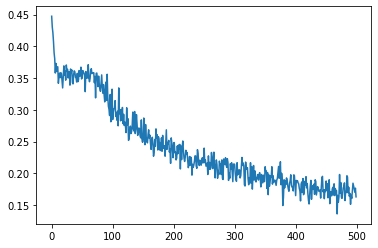

In [3]:
rbm = RBM_Bernoulli(data, N_H=N_H, device="cpu")                                    
rbm.learn(batchsize=10, n_epochs=500, lr=5e-3, lr_decay=0.995, mom=0.9, wc=0, sp=None, x=2) 

plt.plot(rbm.errors)   
plt.show() 

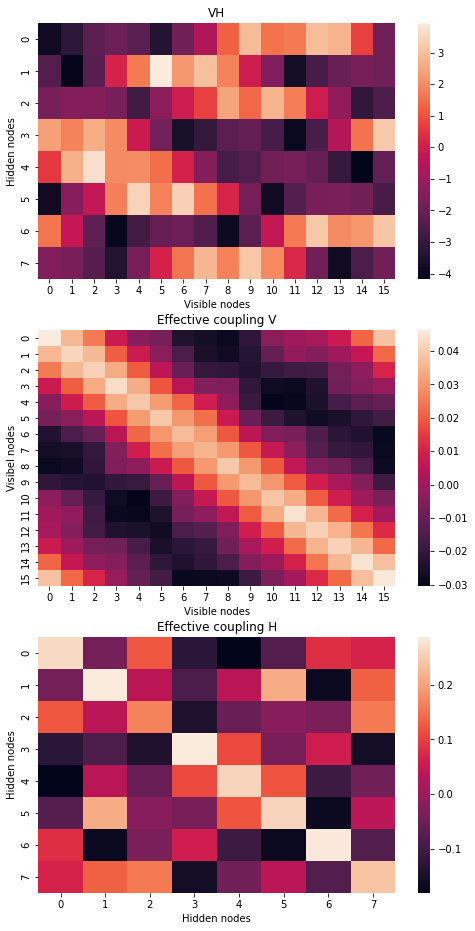

<AxesSubplot:ylabel='Density'>

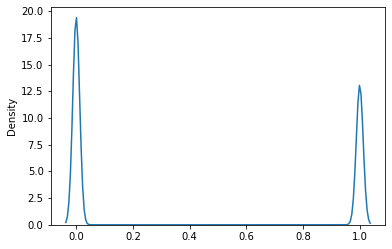

In [4]:
h = torch.zeros(N_H, data.shape[1])
for i in range(data.shape[1]):
    _, h[:, i] = rbm.visible_to_hidden(data[:, i].float())
    
plot_effective_coupling_VH(rbm.W, data.float(), h)
sns.kdeplot(np.array(h.ravel().cpu()), bw_adjust=0.1)

100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 716.14it/s]


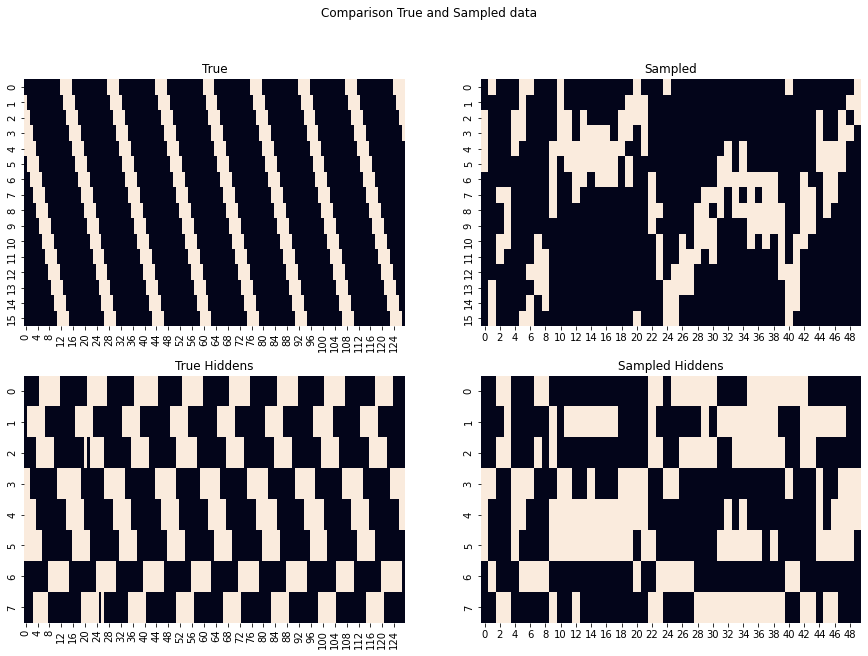

In [5]:
T = data.shape[1]
v_sampled, h_sampled = rbm.sample(data[:, T//2].float(), pre_gibbs_k=100, gibbs_k=20, mode=1, chain=50)
plot_true_sampled(data.float(), h, v_sampled, h_sampled)

# RBM Bernoulli-Bernoulli centered potential


D:\RU\OneDrive\Intern\rtrbm_master\boltzmann_machines\RBM_centered.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mu_V = torch.tensor(torch.mean(self.data, 1), dtype=self.dtype, device=self.device)
100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:43<00:00, 11.48it/s]


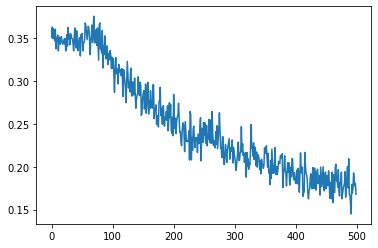

In [6]:
rbm1 = RBM_Bernoulli_centered(data, N_H=N_H, device="cpu")                                    
rbm1.learn(batchsize=10, n_epochs=500, lr=5e-3, lr_decay=0.995, mom=0.9, wc=0, sp=None, x=2) 

plt.plot(rbm1.errors)   
plt.show() 

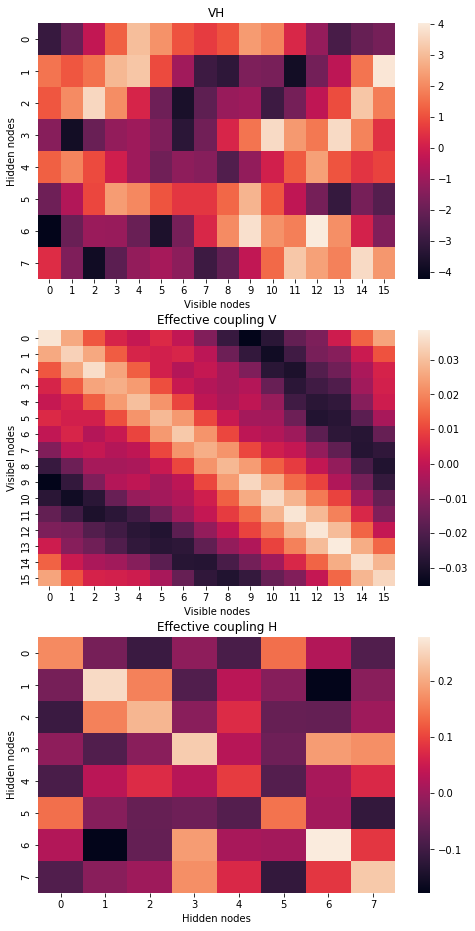

<AxesSubplot:ylabel='Density'>

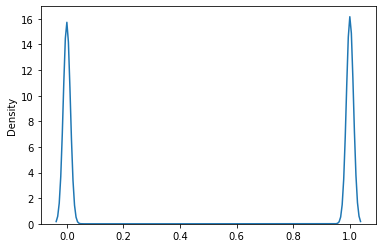

In [7]:
h = torch.zeros(N_H, data.shape[1])
for i in range(data.shape[1]):
    _, h[:, i] = rbm1.visible_to_hidden(data[:, i].float())
    
plot_effective_coupling_VH(rbm1.W, data.float(), h)
sns.kdeplot(np.array(h.ravel().cpu()), bw_adjust=0.1)

100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 618.71it/s]


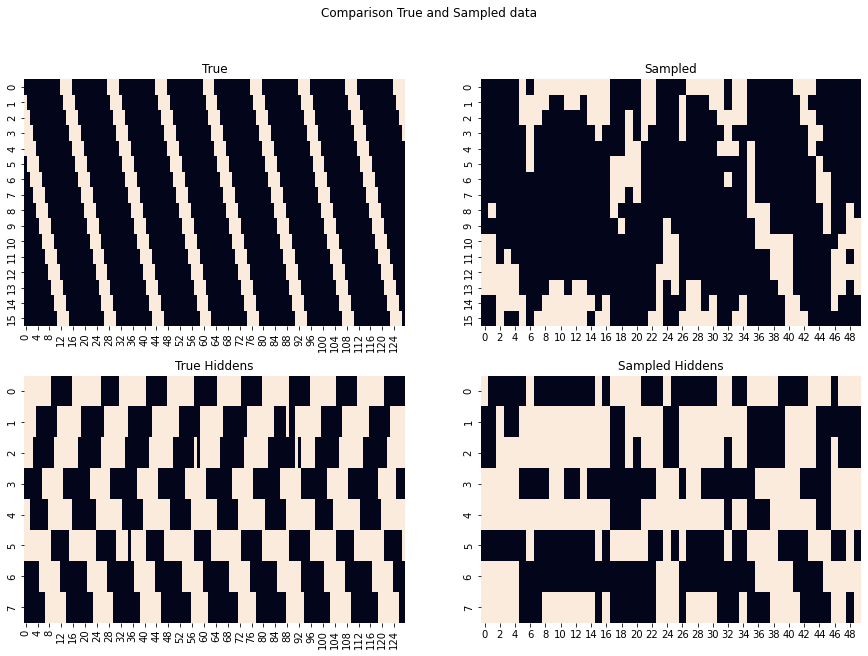

In [8]:
T = data.shape[1]
v_sampled, h_sampled = rbm1.sample(data[:, T//2].float(), pre_gibbs_k=100, gibbs_k=20, mode=1, chain=50)
plot_true_sampled(data.float(), h, v_sampled, h_sampled)

# RBM Bernoulli-dReLU potential


  0%|                                                                                          | 0/500 [00:00<?, ?it/s]D:\RU\OneDrive\Intern\rtrbm_master\boltzmann_machines\RBM_dReLU.py:143: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  p_plus = torch.tensor(1 / (1 + (etg_min / torch.sqrt(self.gamma_m)) / (etg_plus / torch.sqrt(self.gamma_p))), \
100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [40:08<00:00,  4.82s/it]


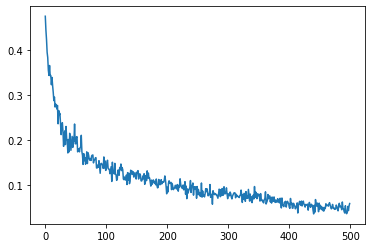

In [9]:
rbm2 = RBM_dReLU(data, N_H=N_H, device="cpu")                                    
rbm2.learn(batchsize=10, n_epochs=500, lr=5e-3, lr_decay=0.995, mom=0.9, wc=0, sp=None, x=2) 

plt.plot(rbm2.errors)   
plt.show() 

D:\RU\OneDrive\Intern\rtrbm_master\boltzmann_machines\RBM_dReLU.py:143: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  p_plus = torch.tensor(1 / (1 + (etg_min / torch.sqrt(self.gamma_m)) / (etg_plus / torch.sqrt(self.gamma_p))), \


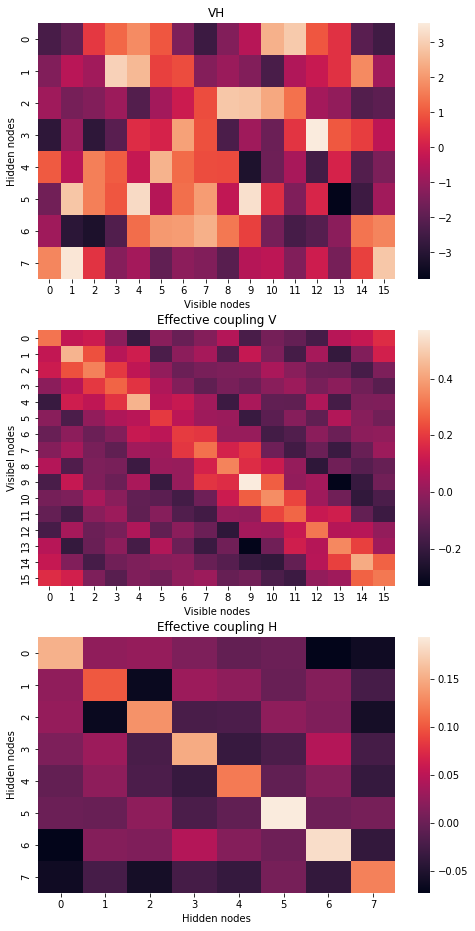

<AxesSubplot:ylabel='Density'>

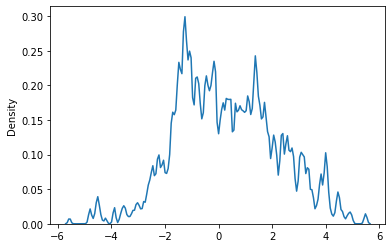

In [10]:
h = torch.zeros(N_H, data.shape[1])
for i in range(data.shape[1]):
    h[:, i] = rbm2.visible_to_hidden(data[:, i].float())
    
plot_effective_coupling_VH(rbm2.W, data.float(), h)
sns.kdeplot(np.array(h.ravel().cpu()), bw_adjust=0.1)

D:\RU\OneDrive\Intern\rtrbm_master\boltzmann_machines\RBM_dReLU.py:143: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  p_plus = torch.tensor(1 / (1 + (etg_min / torch.sqrt(self.gamma_m)) / (etg_plus / torch.sqrt(self.gamma_p))), \
100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.07it/s]


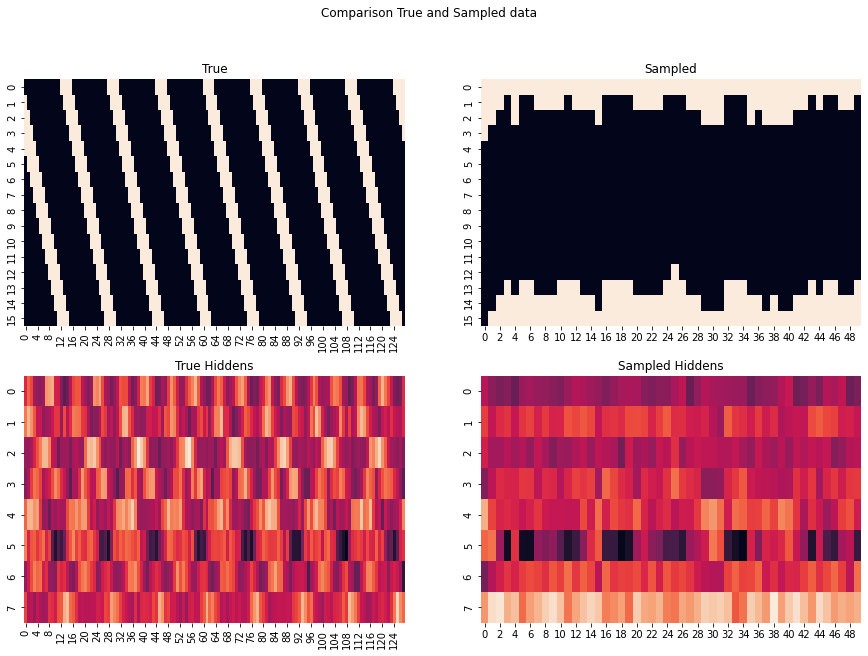

In [11]:
T = data.shape[1]
v_sampled, h_sampled = rbm2.sample(data[:, T//2].float(), pre_gibbs_k=1, gibbs_k=20, mode=1, chain=50)
plot_true_sampled(data.float(), h, v_sampled, h_sampled)

# RBM Bernoulli-dReLU potential - centered


In [13]:
# RBM Bernoulli-dReLU potential centered
rbm3 = RBM_dReLU_centered(data, N_H=N_H, device="cpu")                                    
rbm3.learn(batchsize=10, n_epochs=500, lr=5e-3, lr_decay=0.995, mom=0.9, wc=0, sp=None, x=2) 

plt.plot(rbm3.errors)   
plt.show() 


 20%|███████████████▌                                                              | 100/500 [15:13<1:00:54,  9.14s/it]


IndexError: index 100 is out of bounds for dimension 0 with size 100

In [ ]:
h = torch.zeros(N_H, data.shape[1])
for i in range(data.shape[1]):
    h[:, i] = rbm3.visible_to_hidden(data[:, i].float())
    
plot_effective_coupling_VH(rbm3.W, data.float(), h)
sns.kdeplot(np.array(h.ravel().cpu()), bw_adjust=0.1)

In [ ]:
T = data.shape[1]
v_sampled, h_sampled = rbm3.sample(data[:, T//2].float(), pre_gibbs_k=100, gibbs_k=20, mode=1, chain=50)
plot_true_sampled(data.float(), h, v_sampled, h_sampled)

# Math

First the potential of the hidden units:

$\mathcal{U}_{\mu}(h)=\frac{1}{2} \gamma_{\mu,+} h_{+}^{2}+\frac{1}{2} \gamma_{\mu,-} h_{-}^{2}+\theta_{\mu,+} h_{+}+\theta_{\mu,-} h_{-}$

Note that the hiddens has two domains from -$\infty$ to $0$ and from $0$ to $\infty$, therefore the conditional probability is

$\begin{aligned} P(h \mid I) &=\left\{\begin{array}{l}\frac{1}{Z} \exp \left[-\frac{\gamma^{+}}{2} h^{2}-\left(\theta^{+}-I\right)\right. \\ \frac{1}{Z} \exp \left[-\frac{\gamma^{-}}{2} h^{2}-\left(\theta^{-}-I\right)\right]\end{array}\right] \text { if } h \geq 0, \text { if } h \leq 0 \\ &=p^{+} 1_{h \geq 0} \frac{e^{-\frac{\gamma_{+}}{2} h^{2}+\left(I-\theta^{+}\right) h}}{Z_{+}}+p^{-} 1_{h<0} \frac{e^{-\frac{\gamma^{-}}{2} h^{2}+\left(I-\theta^{-}\right) h}}{Z_{-}} \end{aligned}$

Now let us introduce the gaussian time error function: 

$\Phi(x)=\exp \left(\frac{x^{2}}{2}\right)\left[1-\operatorname{erf}\left(\frac{x}{\sqrt{2}}\right)\right] \sqrt{\frac{\pi}{2}}$

The mean activation of hidden is then given by

$\langle h \mid I\rangle=p^{+}\left[\frac{I-\theta^{+}}{\gamma^{+}}+\frac{1}{\sqrt{\gamma^{+}} \Phi\left(\frac{I_{+}+\theta+}{\sqrt{\gamma^{+}}}\right)}\right]+p^{-}\left[\frac{I-\theta^{-}}{\gamma^{-}}-\frac{1}{\sqrt{\gamma^{-}} \Phi\left(\frac{I-\theta^{-}}{\sqrt{r^{-}}}\right)}\right]$

and the gradients

- $\partial_{\theta^{+}} \Gamma(I)=-\langle\max (h, 0) \mid I\rangle=-p^{+}\left[\frac{I-\theta^{+}}{\gamma^{+}}+\frac{1}{\sqrt{\gamma^{+}} \Phi\left(\frac{-I_{+}+\theta^{+}}{\sqrt{\gamma^{+}}}\right)}\right]$
- $\partial_{\theta^{-}} \Gamma(I)=-\langle\min (h, 0) \mid I\rangle=-p^{-}\left[\frac{I-\theta^{-}}{\gamma^{-}}-\frac{1}{\sqrt{\gamma^{-}} \Phi\left(\frac{I-\theta^{-}}{\sqrt{\gamma^{-}}}\right)}\right]$
- $\partial_{\gamma^{+}} \Gamma(I)=-\frac{1}{2}\left\langle\max (h, 0)^{2} \mid I\right\rangle=-\frac{1}{2} p^{+}\left[\frac{1}{\gamma^{+}}+\left(\frac{I-\theta^{+}}{\gamma^{+}}\right)^{2}+\frac{I-\theta^{+}}{\gamma^{+} \Phi\left(\frac{I+\theta^{+}}{\sqrt{\gamma^{+}}}\right)}\right]$
- $\partial_{\gamma^{-}} \Gamma(I)=-\frac{1}{2}\left\langle\min (h, 0)^{2} \mid I\right\rangle=-\frac{1}{2} p^{-}\left[\frac{1}{\gamma^{-}}+\left(\frac{I-\theta^{-}}{\gamma^{-}}\right)^{2}-\frac{I-\theta^{-}}{\gamma^{-} \Phi\left(\frac{I-\theta^{-}}{\sqrt{\gamma^{-}}}\right)}\right]$


The substitution of variables and new parametrization helps better quantifying and interpreting the nongaussianity of the potential and makes the effective potential invariant. $\gamma$ and $\theta$ are the same parameters as for the quadratic potential, they control the curvature (resp. offset) of the potential, i.e. the slope and the offset of the transfer function. $\eta \in[-1,1]$ quantifies the asymmetry of the potential: for $\eta=\pm 1, \mathcal{U}(h)=\infty \quad \forall x \lessgtr 0$ and the hidden unit becomes a single ReLU. $\Delta$ quantifies the first derivative jump: for $\Delta<0$, the potential has two local minima and the distribution is bimodal whereas for $\Delta>0$, there is a single minimum with singular curvature, and the distribution is sparse. In terms of moments, $\theta, \gamma, \eta$ and $\Delta$ control respectively the mean, variance, skewness and kurtosis of the distribution of $h_{\mu}$. If $\Delta=\eta=0$, the potential is effectively quadratic.

$\left\{\begin{array}{rlr}
\gamma & = & \frac{2 \gamma^{+} \gamma^{-}}{\gamma^{+}+\gamma^{-}} \\
\eta & = & \frac{\gamma^{-}-\gamma^{+}}{\gamma^{-}+\gamma^{+}} \\
\theta & =\frac{\gamma^{-}}{\gamma^{+}+\gamma^{+}} \theta^{+}+\frac{\gamma^{+}}{\gamma^{+}+\gamma^{-}} \theta^{-} \\
\Delta & =\frac{2 \gamma^{+} \gamma^{-}}{\left(\gamma^{+}+\gamma^{-}\right)^{2}}\left(\theta^{+}-\theta^{-}\right)
\end{array}\right.$


New mean activation of hiddens

\left.\begin{array}{rl}
\langle h \mid I\rangle & =\frac{1}{\gamma}\left\{(I-\theta)\left(1+\eta\left(p_{+}-p_{-}\right)\right)-\Delta\left(p_{+}-p_{-}\right)+\right. \\
& \sqrt{1+\eta} \Phi\left(\frac{\frac{\Delta}{\sqrt{1+\eta}}-\sqrt{1+\eta}(I-\theta)}{\sqrt{\gamma}}\right)+\sqrt{1-\eta} \Phi\left(\frac{\frac{\Delta}{\sqrt{1-\eta}}+\sqrt{1-\eta}(I-\theta)}{\sqrt{\gamma}}\right)
\end{array}\right\}

and the gradients

- $\Large\partial_{\theta} \Gamma(I)=\langle h \mid I\rangle$
- $\Large\partial_{\gamma} \Gamma(I)=-\frac{1}{2}\left\langle\frac{1}{1+\eta} \max (h, 0)^{2}-\frac{1}{1-\eta} \min (h, 0)^{2} \mid I\right\rangle$
- $\Large\partial_{\Delta} \Gamma(I)=-\left\langle\frac{1}{1+\eta} \max (h, 0)-\frac{1}{1-\eta} \min (h, 0) \mid I\right\rangle$
- $\Large\partial_{\eta} \Gamma(I)=\left\langle\frac{\gamma}{2}\left(\frac{1}{(1+\eta)^{2}} \max (h, 0)^{2}-\frac{1}{(1-\eta)^{2}} \min (h, 0)^{2}\right)+\Delta\left(\frac{1}{(1+\eta)^{2}} \max (h, 0)-\frac{1}{(1-\eta)^{2}} \min  \right.\right.$

------------------------------------------------------------------------------------------------------------------------
Im not sure but i rewrote the equations into:

- $\Large\partial_{\theta} \Gamma(I)=\partial_{\theta^{+}} \Gamma(I) - \partial_{\theta^{-}} \Gamma(I)$
- $\Large\partial_{\gamma} \Gamma(I)=\frac{\partial_{\gamma^{+}} \Gamma(I)}{1+\eta} - \frac{\partial_{\gamma^{-}} \Gamma(I)}{1-\eta}$
- $\Large\partial_{\Delta} \Gamma(I)=\frac{\partial_{\theta^{+}} \Gamma(I)}{1+\eta} - \frac{\partial_{\theta^{-}} \Gamma(I)}{1-\eta}$
- $\Large\partial_{\eta} \Gamma(I)= -\gamma(\frac{\partial_{\gamma^{+}} \Gamma(I)}{(1+\eta)^2} - \frac{\partial_{\gamma^{-}} \Gamma(I)}{(1-\eta)^2}) - \Delta(\frac{\partial_{\theta^{+}} \Gamma(I)}{(1+\eta)^2} - \frac{\partial_{\theta^{-}} \Gamma(I)}{(1-\eta)^2})$

When i looked through the code of Jerome i saw that they did the same thing, computing the original gradietns and update them accordingly to obtain the gradients of the substituded variables


Furthermore, the code of jerome also implemented a batch normalization, which i also did. (https://arxiv.org/pdf/1502.03167.pdf). The batch normalization makes sure that we have $Var(h_\mu)=1$ and $\left\langle h_{\mu}\right\rangle \sim 0$ $\forall \mu$






The idea is to reparametrize the network such that all intermediate activities have zero mean and unit variance. For the quadratic potential, we adapt this idea and choose $\gamma_{\mu}$ and $\theta_{\mu}$ such that:

$\text { The Quadratic or Gaussian potential: } \mathcal{U}(x)=\frac{1}{2} \gamma x^{2}+\theta x, \quad \text { with } x \in \mathbb{R}$

$\left\langle h_{\mu}(\mathbf{v})\right\rangle_{d}=0, \quad \operatorname{Var}\left[h_{\mu}(\mathbf{v})\right]_{d}=1$

where Var denotes the variance. These implicit equations over $\gamma_{\mu}, \theta_{\mu}$ can be solved analytically:

$\gamma_{\mu}=\frac{1+\sqrt{1+4 \operatorname{Var}\left[I_{\mu}(\mathbf{v})\right]_{d}}}{2}, \quad \theta_{\mu}=\left\langle I_{\mu}(\mathbf{v})\right\rangle_{d} \equiv \sum_{i} w_{i \mu}\left\langle v_{i}\right\rangle_{d}$


Since $\gamma_{\mu}, \theta_{\mu}$ must be updated after each SGD step and evaluating $\operatorname{Var}\left[I_{\mu}(\mathbf{v})\right]_{d}$ using the entire data set is computationally expensive, we compute it using only the current mini-batch (before performing the gradient update), and use an exponential moving average over $\gamma_{\mu}$. Moreover, since $\gamma_{\mu}, \theta_{\mu}$ are functions of $\mathrm{w}$, the gradients with respect to the weights must be updated accordingly as:

$\frac{\partial}{\partial w_{i \mu}} \mathcal{L} \leftarrow \frac{\partial}{\partial w_{i \mu}} \mathcal{L}+\frac{\partial \gamma_{\mu}}{\partial w_{i \mu}} \frac{\partial}{\partial \gamma_{\mu}} \mathcal{L}+\frac{\partial \theta_{\mu}}{\partial w_{i \mu}} \frac{\partial}{\partial \theta_{\mu}} \mathcal{L}$

Which gives, after taking derivative of Eqn. 5.2

$\begin{aligned}
\frac{\partial \mathcal{L}}{\partial w_{i \mu}} &=\left\{\left\langle v_{i} h_{\mu}\right\rangle_{d}-\left\langle v_{i}\right\rangle_{d}\left\langle h_{\mu}\right\rangle_{d}\right\}-\left\{\left\langle v_{i} h_{\mu}\right\rangle_{m}-\left\langle v_{i}\right\rangle_{d}\left\langle h_{\mu}\right\rangle_{m}\right\} \\
&+\frac{\operatorname{Cov}\left[I_{\mu}(\mathbf{v}), v_{i}\right]_{d}}{\sqrt{1+4 \operatorname{Var}\left[I_{\mu}(\mathbf{v})\right]_{d}}}\left\{\left\langle h_{\mu}^{2}\right\rangle_{d}-\left\langle h_{\mu}^{2}\right\rangle_{m}\right\}
\end{aligned}$


They use a similar approach for the dReLU potential. With this parameterization here mentioned above, the following transformation: $\gamma \rightarrow \lambda^{2} \gamma, I \rightarrow \lambda I$, $\theta \rightarrow \lambda \theta, \Delta \rightarrow \lambda \Delta$ leaves the effective potential invariant (up to an additive term), hence $\gamma$ can be chosen arbitrarily in the model. On the other hand, due to the presence of order 3 terms in $\Gamma$, changing $\theta$ cannot be compensated by changing the visible layer fields like in the Gaussian case. Rather, we proceed as in the centering trick, and set:

$\theta=\tilde{\theta}+\langle I\rangle$

$\text { And choose } \gamma \text { such that: } \operatorname{Var}[h]_{M S A}=1$

At this point, one should realize that Eqn. (A.1o) cannot be solved analytically. It is extremely tempting to not perform exact batch normalization, and use the same formula for $\gamma$ as in the Gaussian case; after all, we could expect that the distribution would be approximately normalized and that divergence problems are still solved even if exact normalization is not achieved. It matters however when the RBM is regularized (e.g., with $L_{1}$ norm on the weights), as the outcome of regularized training depends on the parametrization choice. In fact, when trying to train regularized dReLU with the Gaussian gauge choice, no optimum was found, but instead an asymptotic divergence of the form $\mathbf{w} \rightarrow 0, \Delta \rightarrow-\infty$ appeared, such that the inputs of the hidden unit go to zero but the slope of the average activity goes to infinity. Thus exact batch normalization is required, and we must proceed. We rewrite Eqn. (A.1o) as:

$\begin{aligned}
1 &=\langle\operatorname{Var}[h \mid \mathbf{v}]\rangle_{M S A}+\operatorname{Var}[\langle h \mid \mathbf{v}\rangle]_{M S A} \\
\Longleftrightarrow 1 &=\frac{1}{\gamma^{2}} \operatorname{Var}[\mathcal{E}(I(\mathbf{v})-\theta, \Delta, \gamma, \eta)]_{M S A}+\frac{1}{\gamma}\left(1+\langle\mathcal{V}(I(\mathbf{v})-\theta, \Delta, \gamma, \eta)\rangle_{M S A}\right) \\
\Longleftrightarrow \gamma &=\frac{1}{2}\left\{1+\langle\mathcal{V}(I(\mathbf{v})-\theta, \Delta, \gamma, \eta)\rangle_{d}\right.\\
&\left.+\sqrt{\left(1+\langle\mathcal{V}(I(\mathbf{v})-\theta, \Delta, \gamma, \eta)\rangle_{d}\right)^{2}+4 \operatorname{Var}[\mathcal{E}(I(\mathbf{v})-\theta, \Delta, \gamma, \eta)]_{d}}\right\} \\
& \equiv G\left(\gamma, \theta, \Delta, \eta, P_{d}\right)
\end{aligned}$

The above implicit equation A.11 is solved iteratively through $\gamma^{(t+1)}=$ $\Gamma\left(\gamma^{(t)}, \delta, \theta, \eta, P_{d}\right)$. As for the Gaussian case, we evaluate the expectation and variances on a mini-batch before computing the gradient, and we perform only one iteration step per gradient update. Furthermore, we use an exponential smoothing $\gamma^{(t+1)}=\rho \Gamma\left(\gamma^{(t)}, \delta, \theta, \eta, P_{d}\right)+(1-\rho) \gamma^{(t)}$ after a while, with $\rho_{i}=1$

and $\rho \rightarrow 0$ to ensure convergence. Lastly, unlike the Gaussian case, the nonlinear moments estimators can have a very large variance, particularly when hidden unit $h_{\mu}$ encodes for a very rare feature; in that case, the variance can decrease abruptly, yielding large fluctuations of $\gamma$. To alleviate this problem, we bound $\gamma^{(t+1)} \geq \frac{3}{4} \gamma^{(t)}$. To obtain the gradient, one needs to compute the derivatives of $\mathcal{E}, \mathcal{V}$. They can be obtained, in principle, by automatic symbolic differentiation; however, numerical stability problems arose with the expression obtained. Instead we derived analytically the derivatives as follows. When they appear, $\xi, \xi^{\prime}$ denote any of the $I, \theta, \Delta, \eta$.

This here above I got from Restricted Boltzmann machines: from compositional representations to protein sequence analysis (Jerome 2018)

With this and the code they provided I implemented the dReLU HU potential with the centering. I deduced the following pseudo code


- for epoch
- ....for batch
- ........for batchsize
- ............Take v_data -> obtain h_data, v_model, h_model with CD
- ............Compute error
- ........Compute mean gradient of the batch
- ........Update batch normalization
- ........Change to centered gradients
- ........Update centered gradients with cross-derivatives
- ........Update centered parameters with gradient
- ........Recompute original parameters of HU dReLU potential

Im not sure this is the right way, here above are some results of the Bouncing Ball data without boundaries


### Other thing to talk about


To do:
- Check Rules and regulations voor samenwerking binnen thesis. Moeten jij en Casper nog wat regelen met examencommissie? https://www.ru.nl/courseguides/science/rules-requests/education-regulations/

- Registratie master stage in Osiris. Maak nieuwe zaak aan en vul internshipform in samen met begeleider:
https://www.ru.nl/courseguides/science/master/master-physics-astronomy/master-thesis-research-internship/procedure-registration-master-internship-physics/

- Vakkenpakket: Titel en 2e supervisor toevoegen. Uiterlijk 6 weken voor afstuderen opsturen naar examencommissie.

- Als je naar het buitenland gaat, neem contact op met International Office (huisvesting? beurs?)
https://www.ru.nl/science/education/international/

- implement HU activity distribution